In [225]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import re 
import datetime as dt

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 예측
# Decision tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor
# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
# Support Vector Machine (예측)
from sklearn.svm import SVR
# KNN
from sklearn.neighbors import KNeighborsRegressor
#군집분석
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN

### 분류
#평가함수 (분류)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#로지스틱 회귀분석
from statsmodels.api import Logit
# Decision tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# Support Vector Machine (분류)
from sklearn.svm import SVC
# KNN
from sklearn.neighbors import KNeighborsClassifier
#모델 평가
from sklearn.metrics import f1_score, roc_curve, auc
#주성분 분석
from sklearn.decomposition import PCA


#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

In [226]:
df_raw_scale = pd.read_csv("C:/Users/Sewon Lee/Desktop/POSCO_빅데이터 AI/1. 과제/★ 빅데이터 조별 과제/Data/조사 Data/지역 찾기_취합.csv")

In [227]:
df_raw_scale = df_raw_scale.drop(['검색:초미세','검색:미세','경인지역과의 거리(공장)','경인지역과의 거리(공장)(100점환산)','인구수'], axis = 1, inplace =False)

In [228]:
df_raw_x = df_raw_scale.drop(["지역"], axis = 1, inplace =False)
df_raw_y = df_raw_scale["지역"]

v_feature_name = df_raw_x.columns

scaler = StandardScaler()
df_raw = scaler.fit_transform(df_raw_x)
df_raw = pd.DataFrame(df_raw, columns = v_feature_name)
df_raw['지역'] = df_raw_scale['지역']
df_raw[:5]

,여자/남자,도시인구비율,203040비율,미세양,초미세양,SO2,CO,O3,NO2,PM10,PM25,지역
0,-0.332324,-0.898470,-1.138202,-1.008541,0.400281,-1.357247,-0.191964,-0.292827,-1.034171,-1.421683,-0.678144,강원
1,-0.400109,0.531696,1.179591,1.220357,0.700046,0.704706,0.031157,0.428401,0.679128,0.733695,0.417580,경기
2,-0.784079,-0.776827,-0.144862,0.281688,-1.203223,-0.398988,-0.211915,0.029878,-0.202765,-0.100384,-1.230580,경남
3,-0.325245,-1.120032,-1.138202,1.100826,0.143340,-0.563077,-0.487744,0.104452,-0.854251,0.173771,0.322520,경북
4,0.702667,1.039987,0.848478,0.077783,0.224229,-0.888794,1.385166,-0.593664,0.730409,0.650726,0.805178,광주


In [229]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 12 columns):
여자/남자       16 non-null float64
도시인구비율      16 non-null float64
203040비율    16 non-null float64
미세양         16 non-null float64
초미세양        16 non-null float64
SO2         16 non-null float64
CO          16 non-null float64
O3          16 non-null float64
NO2         16 non-null float64
PM10        16 non-null float64
PM25        16 non-null float64
지역          16 non-null object
dtypes: float64(11), object(1)
memory usage: 1.6+ KB


Text(0, 0.5, 'sample index')

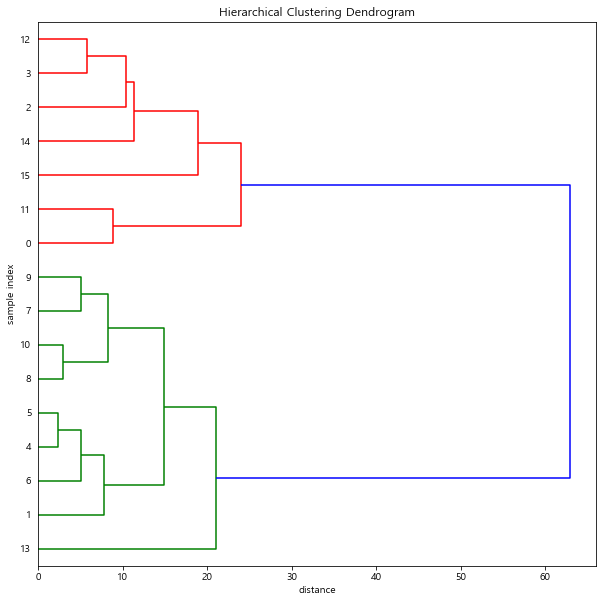

In [230]:
Z_ward = linkage(df_raw_x, method = "ward", metric="euclidean")
Z_average = linkage(df_raw_x, method = "average" ,metric="euclidean")
Z_Minkowski = linkage(df_raw_x, method = "average", metric="minkowski")

plt.figure(figsize=(10,10))
ax=plt.subplot(111)

dendrogram(Z_ward, leaf_font_size = 10, orientation = "right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [231]:
df_raw['지역']

0     강원
1     경기
2     경남
3     경북
4     광주
5     대구
6     대전
7     부산
8     서울
9     울산
10    인천
11    전남
12    전북
13    제주
14    충남
15    충북
Name: 지역, dtype: object

In [232]:
cluster_hierarchical = fcluster(Z=Z_ward, t=5, criterion = "distance")

df_raw["ClusterHierarchical"] = cluster_hierarchical
df_raw.head()

,여자/남자,도시인구비율,203040비율,미세양,초미세양,SO2,CO,O3,NO2,PM10,PM25,지역,ClusterHierarchical
0,-0.332324,-0.898470,-1.138202,-1.008541,0.400281,-1.357247,-0.191964,-0.292827,-1.034171,-1.421683,-0.678144,강원,8
1,-0.400109,0.531696,1.179591,1.220357,0.700046,0.704706,0.031157,0.428401,0.679128,0.733695,0.417580,경기,3
2,-0.784079,-0.776827,-0.144862,0.281688,-1.203223,-0.398988,-0.211915,0.029878,-0.202765,-0.100384,-1.230580,경남,12
3,-0.325245,-1.120032,-1.138202,1.100826,0.143340,-0.563077,-0.487744,0.104452,-0.854251,0.173771,0.322520,경북,10
4,0.702667,1.039987,0.848478,0.077783,0.224229,-0.888794,1.385166,-0.593664,0.730409,0.650726,0.805178,광주,1


In [233]:
ds_summary_hc = df_raw.groupby("ClusterHierarchical").agg(["min","mean","max"])
level0=ds_summary_hc.columns.get_level_values(0)
level1=ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 + "_" + level1
ds_summary_hc.reset_index(inplace=True)
ds_summary_hc.round(3)

,ClusterHierarchical,여자/남자_min,여자/남자_mean,여자/남자_max,도시인구비율_min,도시인구비율_mean,도시인구비율_max,203040비율_min,203040비율_mean,203040비율_max,...,O3_max,NO2_min,NO2_mean,NO2_max,PM10_min,PM10_mean,PM10_max,PM25_min,PM25_mean,PM25_max
0,1,0.703,0.799,0.894,0.965,1.003,1.040,0.186,0.517,0.848,...,-0.594,0.730,0.846,0.961,0.417,0.534,0.651,0.440,0.623,0.805
1,2,0.171,0.171,0.171,1.040,1.040,1.040,1.180,1.180,1.180,...,-1.380,0.793,0.793,0.793,1.038,1.038,1.038,0.514,0.514,0.514
2,3,-0.400,-0.400,-0.400,0.532,0.532,0.532,1.180,1.180,1.180,...,0.428,0.679,0.679,0.679,0.734,0.734,0.734,0.418,0.418,0.418
3,4,-0.006,1.040,2.086,0.847,0.944,1.040,0.848,1.180,1.511,...,0.844,0.229,1.068,1.906,-0.053,0.081,0.216,-0.308,-0.247,-0.187
4,5,1.568,1.568,1.568,0.996,0.996,0.996,-0.476,-0.476,-0.476,...,0.033,0.371,0.371,0.371,-0.647,-0.647,-0.647,-0.638,-0.638,-0.638
5,6,-2.081,-2.081,-2.081,0.634,0.634,0.634,0.848,0.848,0.848,...,0.077,0.055,0.055,0.055,-1.043,-1.043,-1.043,-0.568,-0.568,-0.568
6,7,-0.250,-0.250,-0.250,0.559,0.559,0.559,-0.145,-0.145,-0.145,...,3.151,-1.996,-1.996,-1.996,-1.873,-1.873,-1.873,-1.785,-1.785,-1.785
7,8,-0.332,-0.332,-0.332,-0.898,-0.898,-0.898,-1.138,-1.138,-1.138,...,-0.293,-1.034,-1.034,-1.034,-1.422,-1.422,-1.422,-0.678,-0.678,-0.678
8,9,0.199,0.199,0.199,-1.603,-1.603,-1.603,-2.132,-2.132,-2.132,...,0.157,-1.002,-1.002,-1.002,-1.232,-1.232,-1.232,-1.037,-1.037,-1.037
9,10,-0.325,-0.325,-0.325,-1.120,-1.120,-1.120,-1.138,-1.138,-1.138,...,0.104,-0.854,-0.854,-0.854,0.174,0.174,0.174,0.323,0.323,0.323


In [234]:
n_iter_cluster = 15
cluster_range = [i+1 for i in range (n_iter_cluster)]
clus_error= []
for v_n_clus in cluster_range :
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    clus_error.append(clus.inertia_)

ds_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error": clus_error})
ds_error

,NumberofCluster,Error
0,1,3047.897259
1,2,1068.946985
2,3,748.071165
3,4,491.292711
4,5,340.812669
5,6,261.496340
6,7,206.440503
7,8,155.002284
8,9,112.337748
9,10,73.633897


Text(0, 0.5, 'Sum of squared distance')

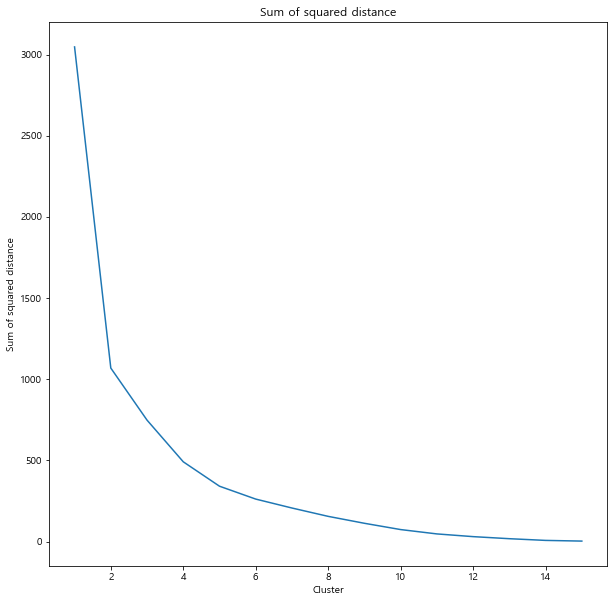

In [235]:
plt.figure(figsize=(10,10))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Cluster")
plt.ylabel("Sum of squared distance")

In [236]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df_raw["ClusterKmeans"] = cluster_kmeans
df_raw.head()

,여자/남자,도시인구비율,203040비율,미세양,초미세양,SO2,CO,O3,NO2,PM10,PM25,지역,ClusterHierarchical,ClusterKmeans
0,-0.332324,-0.898470,-1.138202,-1.008541,0.400281,-1.357247,-0.191964,-0.292827,-1.034171,-1.421683,-0.678144,강원,8,5
1,-0.400109,0.531696,1.179591,1.220357,0.700046,0.704706,0.031157,0.428401,0.679128,0.733695,0.417580,경기,3,4
2,-0.784079,-0.776827,-0.144862,0.281688,-1.203223,-0.398988,-0.211915,0.029878,-0.202765,-0.100384,-1.230580,경남,12,2
3,-0.325245,-1.120032,-1.138202,1.100826,0.143340,-0.563077,-0.487744,0.104452,-0.854251,0.173771,0.322520,경북,10,2
4,0.702667,1.039987,0.848478,0.077783,0.224229,-0.888794,1.385166,-0.593664,0.730409,0.650726,0.805178,광주,1,4


In [237]:
ds_summary_km = df_raw.drop("ClusterHierarchical", axis = 1 , inplace = False).groupby("ClusterKmeans").agg(["min","mean","max"])
level0=ds_summary_km.columns.get_level_values(0)
level1=ds_summary_km.columns.get_level_values(1)
ds_summary_km.columns = level0 + "_" + level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km.round(3)

,ClusterKmeans,여자/남자_min,여자/남자_mean,여자/남자_max,도시인구비율_min,도시인구비율_mean,도시인구비율_max,203040비율_min,203040비율_mean,203040비율_max,...,O3_max,NO2_min,NO2_mean,NO2_max,PM10_min,PM10_mean,PM10_max,PM25_min,PM25_mean,PM25_max
0,1,-2.081,-0.254,1.568,0.559,0.730,0.996,-0.476,0.076,0.848,...,3.151,-1.996,-0.523,0.371,-1.873,-1.188,-0.647,-1.785,-0.997,-0.568
1,2,-1.299,-0.467,0.540,-1.569,-1.073,-0.777,-1.138,-0.642,-0.145,...,0.104,-1.268,-0.678,-0.203,-0.100,0.268,0.659,-1.231,0.140,1.167
2,3,-0.683,-0.683,-0.683,-0.859,-0.859,-0.859,-0.145,-0.145,-0.145,...,-1.208,1.020,1.020,1.020,2.143,2.143,2.143,2.464,2.464,2.464
3,4,-0.400,0.575,2.086,0.532,0.911,1.040,0.186,0.959,1.511,...,0.844,0.229,0.883,1.906,-0.053,0.500,1.038,-0.308,0.280,0.805
4,5,-0.332,-0.067,0.199,-1.603,-1.251,-0.898,-2.132,-1.635,-1.138,...,0.157,-1.034,-1.018,-1.002,-1.422,-1.327,-1.232,-1.037,-0.857,-0.678


In [238]:
X = df_raw["DISSATIS"]
Y = df_raw["CHANCE"]

markers = ["o","v","^","s","<",">","p","D"]

para_eps = [k/10 for k in range(10, 16, 1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize=(15,15))
fig.tight_layout(w_pad=1, h_pad=3)

for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample, eps=eps)
        cluster = dbscan.fit_predict(df_raw_x)
        cluster = cluster+1
        for (n_데clus, clus) in enumerate(range(min(cluster),max(cluster)+1,1)):
            axes[i,j].scatter(X[cluster==clus], Y[cluster == clus],marker = markers[n_clus], s=100)
            axes[i,j].set_title("eps="+str(eps)+",min_sample=" + str(min_sample)+\
                                "\n # of cluser=" + str(max(cluster)),fontsize=15)

KeyError: 'DISSATIS'

In [239]:
dbscan = DBSCAN(eps=1.4, min_samples=2).fit(df_raw_x)
cluster_dbscan = dbscan.labels_

for (i, val) in enumerate(cluster_dbscan):
    if val<0:
        cluster_dbscan[i]=0
    else :
        cluster_dbscan[i] = cluster_dbscan[i]+1

df_raw["ClusterDBScan"] = cluster_dbscan
df_raw.head()

,여자/남자,도시인구비율,203040비율,미세양,초미세양,SO2,CO,O3,NO2,PM10,PM25,지역,ClusterHierarchical,ClusterKmeans,ClusterDBScan
0,-0.332324,-0.898470,-1.138202,-1.008541,0.400281,-1.357247,-0.191964,-0.292827,-1.034171,-1.421683,-0.678144,강원,8,5,0
1,-0.400109,0.531696,1.179591,1.220357,0.700046,0.704706,0.031157,0.428401,0.679128,0.733695,0.417580,경기,3,4,0
2,-0.784079,-0.776827,-0.144862,0.281688,-1.203223,-0.398988,-0.211915,0.029878,-0.202765,-0.100384,-1.230580,경남,12,2,0
3,-0.325245,-1.120032,-1.138202,1.100826,0.143340,-0.563077,-0.487744,0.104452,-0.854251,0.173771,0.322520,경북,10,2,0
4,0.702667,1.039987,0.848478,0.077783,0.224229,-0.888794,1.385166,-0.593664,0.730409,0.650726,0.805178,광주,1,4,0


In [240]:
ds_summary_db = df_raw.drop(["ClusterHierarchical", "ClusterKmeans"],
                            axis = 1,
                            inplace =False).\
                            groupby("ClusterDBScan").agg(["min", "mean", "max"])
level0=ds_summary_db.columns.get_level_values(0)
level1=ds_summary_db.columns.get_level_values(1)
ds_summary_db.columns = level0 + "_" + level1
ds_summary_db.reset_index(inplace=True)
ds_summary_db.round(3)

,ClusterDBScan,여자/남자_min,여자/남자_mean,여자/남자_max,도시인구비율_min,도시인구비율_mean,도시인구비율_max,203040비율_min,203040비율_mean,203040비율_max,...,O3_max,NO2_min,NO2_mean,NO2_max,PM10_min,PM10_mean,PM10_max,PM25_min,PM25_mean,PM25_max
0,0,-2.081,0.0,2.086,-1.603,-0.0,1.04,-2.132,-0.0,1.511,...,3.151,-1.996,0.0,1.906,-1.873,-0.0,2.143,-1.785,0.0,2.464


In [241]:
df_raw.to_csv("C:/Users/Sewon Lee/Desktop/POSCO_빅데이터 AI/1. 과제/★ 빅데이터 조별 과제/Data/제공 Data/군집.csv",encoding = "CP949")